Źrodło danych: https://archive.ics.uci.edu/dataset/33/dermatology

Ta baza danych zawiera 34 atrybuty, z których 33 mają wartości liniowe, a jeden jest nominalny.
Różnicowa diagnoza chorób erytematyczno-łuszczycowych jest rzeczywistym problemem w dermatologii. 
Wszystkie one mają wspólne cechy kliniczne (zaczerwienienie i łuszczenie), z bardzo małymi różnicami. 
Choroby w tej grupie to łuszczyca, łojotokowe zapalenie skóry, liszaj płaski, łupież różowy, przewlekłe zapalenie skóry i łupież rubra mieszkowy. 
Zazwyczaj do diagnozy konieczna jest biopsja, ale niestety te choroby mają także wiele wspólnych cech histopatologicznych. 
Kolejnym utrudnieniem dla różnicowej diagnozy jest to, że choroba może wykazywać cechy innej choroby na początkowym etapie, 
a następnie charakterystyczne cechy na kolejnych etapach. Pacjenci zostali najpierw ocenieni klinicznie pod kątem 12 cech. 
Następnie pobrano próbki skóry do oceny 22 cech histopatologicznych. Wartości cech histopatologicznych są określane przez analizę próbek pod mikroskopem.
W zestawie danych skonstruowanym dla tej dziedziny, cecha historii rodzinnej ma wartość 1, 
jeśli jakiekolwiek z tych chorób zostało zaobserwowane w rodzinie, a 0 w przeciwnym razie. 
Cecha wieku po prostu reprezentuje wiek pacjenta. Każda inna cecha (kliniczna i histopatologiczna) została przypisana stopniowi w zakresie od 0 do 3. 
Tutaj 0 oznacza, że cecha nie była obecna, 3 oznacza największą możliwą ilość, a 1, 2 wskazują na wartości pośrednie względem siebie.

Nazwy i numery identyfikacyjne pacjentów zostały niedawno usunięte z bazy danych.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Wczytanie danych z pliku CSV
file_path = "data/dermatology.data"
column_names = [
    "erythema",
    "scaling",
    "definite_borders",
    "itching",
    "koebner_phenomenon",
    "polygonal_papules",
    "follicular_papules",
    "oral_mucosal_involvement",
    "knee_and_elbow_involvement",
    "scalp_involvement",
    "family_history",
    "melanin_incontinence",
    "eosinophils_in_the_infiltrate",
    "PNL_infiltrate",
    "fibrosis_of_the_papillary_dermis",
    "exocytosis",
    "acanthosis",
    "hyperkeratosis",
    "parakeratosis",
    "clubbing_of_the_rete_ridges",
    "elongation_of_the_rete_ridges",
    "thinning_of_the_suprapapillary_epidermis",
    "spongiform_pustule",
    "munro_microabcess",
    "focal_hypergranulosis",
    "disappearance_of_the_granular_layer",
    "vacuolisation_and_damage_of_basal_layer",
    "spongiosis",
    "saw_tooth_appearance_of_retes",
    "follicular_horn_plug",
    "perifollicular_parakeratosis",
    "inflammatory_monoluclear_inflitrate",
    "band_like_infiltrate",
    "age",
    "class"  # Ostatnia kolumna reprezentuje klasę/chorobę (1-6)
]

df = pd.read_csv(file_path, header=None, names=column_names)

# Wyświetlenie całego DataFrame
df


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [3]:
# Sortowanie według wieku rosnąco (wiek jako tekst)
df_sorted = df.sort_values(by='age')

In [4]:
# Wyświetlenie statystyk opisowych dla każdej kolumny
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


Histogram dla kolumny Age

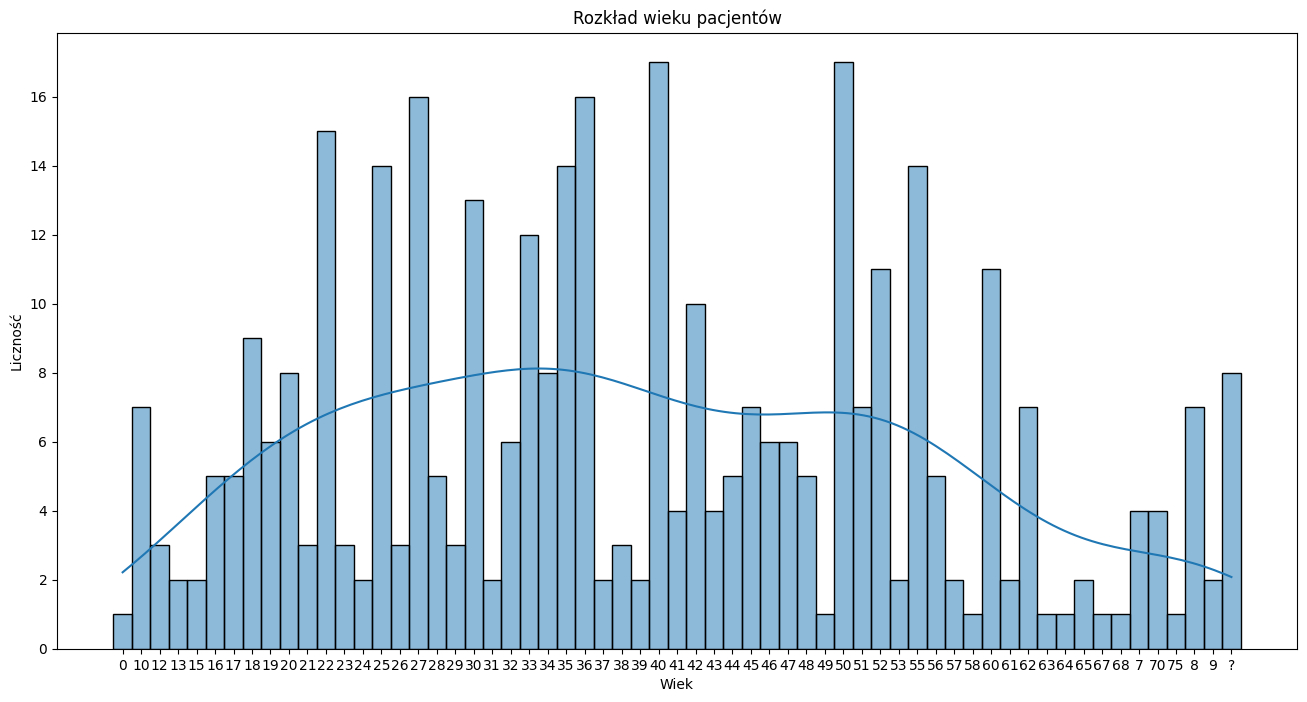

In [5]:
plt.figure(figsize=(16, 8))
sns.histplot(df_sorted['age'], bins=20, kde=True)
plt.title('Rozkład wieku pacjentów')
plt.xlabel('Wiek')
plt.ylabel('Liczność')
plt.show()

Wykres pudełkowy (box plot) dla cechy Age w zależności od klasy (diagnosis)

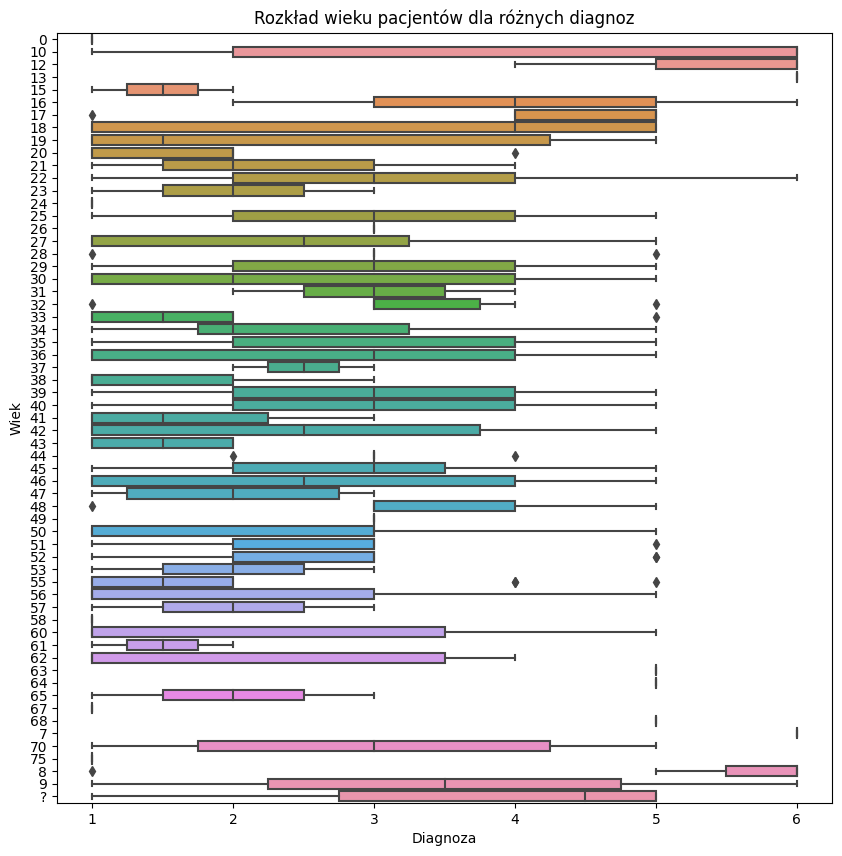

In [6]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='class', y='age', data=df_sorted)
plt.title('Rozkład wieku pacjentów dla różnych diagnoz')
plt.xlabel('Diagnoza')
plt.ylabel('Wiek')
plt.show()

Zamiana znaków "?" na wartości NaN

In [7]:
df.replace("?", float("NaN"), inplace=True)

df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw_tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


Znajdowanie pustych wartości w całym DataFrame

In [8]:
missing_values = df.isna().sum()

missing_values

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi